<p style="font-size:14px; text-align: right">CoastWatch Python Exercises</p>  

# Compare time series from different sensors

Several ocean color sensors have been launched since 1997 to provide continuous global ocean color data. The sensors have differences in design and calibration, and different algorithms may be applied to generate chlorophyll values. Consequently, chlorophyll-a values can vary among the sensors during periods where measurements overlap. 

To examine this phenomenon, we will download and plot time-series of chlorophyll_a concentrations from various sensors from 1997 to the present and see how the measurements compare during periods of overlap. We will use data from the Seawifs (1997-2010), MODIS Aqua (2002-present) and VIIRS SNPP (2012-present) missions.

### Information on the datasets in this tutorial

The OceanWatch website has a data catalog containing documentation and links to all the datasets available:  
https://oceanwatch.pifsc.noaa.gov/doc.html

Navigate to the "Ocean Color" tab. From there you can access the different datasets using ERDDAP or THREDDS.

## Load the Python modules

In [22]:
import urllib.request 
import xarray as xr 
import netCDF4 as nc 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
np.warnings.filterwarnings('ignore')

## Get monthly SeaWiFS data
First, we will visit the ERDDAP web page for our dataset of interest to become familiar with the dataset and to generate a template URL that we will use in Python.

### Finding the data on ERDDAP
* Use a web browser to qo to the ERDDAP operated by the CoastWatch Central Pacific Node:  
https://oceanwatch.pifsc.noaa.gov/erddap/  

* Find the monthly SeaWiFS chlorophyll dataset by entering the dataset ID (sw_chla_monthly_2018_0) in the search box. 

* Click on the "data" link. 
* We are interested in the entire length of record for the dataset, so use the sliders to select the entire time range (1997-09-16T12:00:00Z to 2010-12-16T12:00:00Z)
* Set the latitude range to 15 - 25N. Note that requests for this dataset use a reverse order for the latitude (high to low values), so enter the higher value in the first box and the lower value in the second
* Set the longitude range to 198E - 208E
* to reduce the size of the request for this example, we will add a spacing of 10 to the latitude and longitude variables. This pulls every 10th point.
* Set the "File type" to ".nc" and then click the generate the URL button. 
* Copy the URL from the web page and paste it into your python script, e.g.
> url = 'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/sw_chla_monthly_2018_0.nc?chlor_a%5B(1997-09-16T12:00:00Z):1:(2010-12-16T12:00:00Z)%5D%5B(40):1:(0)%5D%5B(198):1:(208)%5D'   

### Download the data using the "urllib" module 
For each dataset we will download the data, bring it into Python and make time-series plots
In this example we are looking at a long time record so the data requests are large.
Be patient, depending on your network speed thiis could take a while. You should see an hourglass in your browser tab showing that the request is processing.

In [23]:
url = 'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/sw_chla_monthly_2018_0.nc?chlor_a[(1997-10-16T12:00:00Z):1:(2010-10-16T12:00:00Z)][(25):10:(15)][(198):10:(208)]' 
urllib.request.urlretrieve(url, "sw.nc")

('sw.nc', <http.client.HTTPMessage at 0x1133db4f0>)

### Use xarray to bring in the data
* open the dataset
* print information about the data variables

In [24]:
sw_ds = xr.open_dataset('sw.nc',decode_cf=False)
sw_ds.data_vars

Data variables:
    chlor_a  (time, latitude, longitude) float32 ...

The downloaded data contains only one variable: chlor_a.  
    
### Use Numpy and netCDF4 to prepare the data for comparison
* Compute the mean chlorophyll over the region
* Extract the dates corresponding to each month

In [25]:
sw_avg = np.mean(sw_ds.chlor_a,axis=(1,2)) 
sw_dates = nc.num2date(sw_ds.time,sw_ds.time.units) 
sw_ds.close()

## Get monthly MODIS data
* Repeat the steps above to get data for the __MODIS Aqua__ chlorophyll dataset
* This dataset is available on the same ERDDAP
* ERDDAP Dataset ID: aqua_chla_monthly_2018_0
* Download the data as an .nc file (remember this may take a minute)
* Use xarray to bring the data into python
* Use numpy and netCDF4 to create a mean for the area and extract the dates

In [26]:
url2 = 'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/aqua_chla_monthly_2018_0.nc?chlor_a[(2002-07-16T12:00:00Z):1:(2019-12-16T12:00:00Z)][(25):10:(15)][(198):10:(208)]' 
urllib.request.urlretrieve(url2, "aq.nc") 
aq_ds = xr.open_dataset('aq.nc', decode_cf = False) 
aq_ds.data_vars


Data variables:
    chlor_a  (time, latitude, longitude) float32 ...

In [27]:
aq_avg = np.mean(aq_ds.chlor_a,axis = (1,2)) 
aq_dates = nc.num2date(aq_ds.time, aq_ds.time.units) 
aq_ds.close()

## Get monthly VIIRS data
* Repeat the steps above to get data for the __VIIRS SNPP__ chlorophyll dataset
* This dataset is also vailable on the same ERDDAP
* ERDDAP Dataset ID: noaa_snpp_chla_monthly
* Download the data as an .nc file (remember this may take a minute)
* Use xarray to bring the data into python
* Use numpy and netCDF4 to create a mean for the area and extract the dates 

In [28]:
url3 = 'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/noaa_snpp_chla_monthly.nc?chlor_a[(2012-01-02T12:00:00Z):1:(2019-12-01T12:00:00Z)][(25):10:(15)][(198):10:(208)]' 
urllib.request.urlretrieve(url3, "snpp.nc")
snpp_ds = xr.open_dataset('snpp.nc', decode_cf=False) 
snpp_ds.data_vars


Data variables:
    chlor_a  (time, latitude, longitude) float32 ...

In [29]:
snpp_avg = np.mean(snpp_ds.chlor_a, axis = (1, 2)) 
snpp_dates = nc.num2date(snpp_ds.time, snpp_ds.time.units) 
snpp_ds.close()

## Plot the result for the three datasets 
* Make a plot showing the average chlorophyll in the region over time

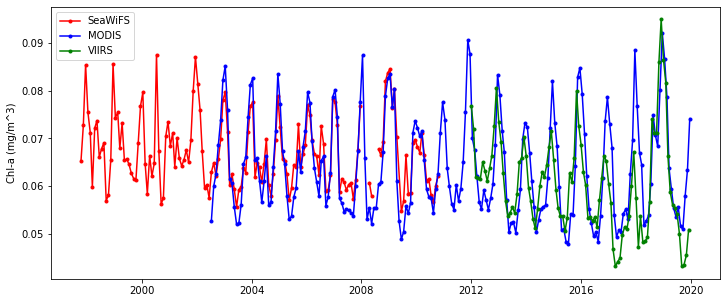

In [30]:
plt.figure(figsize = (12, 5)) 
plt.plot_date(sw_dates, sw_avg,label='SeaWiFS', c='red', marker='.', linestyle='-') 
plt.plot_date(aq_dates, aq_avg, label='MODIS', c='blue', marker='.', linestyle='-') 
plt.plot_date(snpp_dates, snpp_avg, label='VIIRS', c='green', marker='.', linestyle='-') 
plt.ylabel('Chl-a (mg/m^3)') 
plt.legend()
plt.show()

We can see from this plot that there are differences between sensors during periods of data overlap. If you need a single time series from 1997 to present, you would have to devise a method to reconcile the difference in values. 

Fortunately there is a dataset that blends ocean color data from many satellite missions, including the three datasets we have just looked at, into a continuous single dataset. That dataset is also available in ERRDAP so we can easily see how it compares to the others.

The combined dataset is the ESA OC-CCI (ocean color climate change initiative) dataset.

## Get OC-CCI data
* Repeat the steps above to get data for the __ESA OC-CCI__ chlorophyll dataset
* This dataset is also vailable on the same ERDDAP
* ERDDAP Dataset ID: esa-cci-chla-monthly-v5-0
* Download the data as an .nc file (remember this may take a minute)
* Use xarray to bring the data into python
* Use numpy and netCDF4 to create a mean for the area and extract the dates

In [31]:
url4 = 'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/esa-cci-chla-monthly-v5-0.nc?chlor_a[(1997-09-04):1:(2019-12-01T00:00:00Z)][(25):10:(15)][(198):10:(208)]' 
urllib.request.urlretrieve(url4, "cci.nc")
cci_ds = xr.open_dataset('cci.nc',decode_cf=False) 
cci_avg = np.mean(cci_ds.chlor_a,axis=(1,2)) 
cci_dates = nc.num2date(cci_ds.time,cci_ds.time.units) 
cci_ds.close()

## Plot all four datasets 
Add the ESA OC-CCI dataset to the plot to see how it compares with data from the individual satellite missions. 

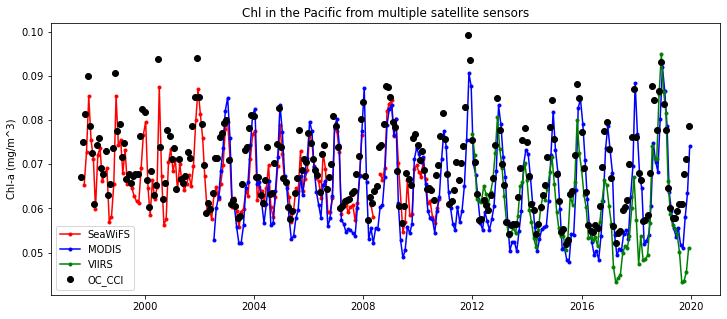

In [32]:
plt.figure(figsize=(12,5)) 
plt.plot_date(sw_dates, sw_avg,label='SeaWiFS', c='red', marker='.', linestyle='-') 
plt.plot_date(aq_dates, aq_avg, label='MODIS', c='blue', marker='.', linestyle='-') 
plt.plot_date(snpp_dates, snpp_avg, label='VIIRS', c='green', marker='.', linestyle='-') 
plt.plot_date(cci_dates, cci_avg, label='OC_CCI', c='black', marker='o') 
plt.title('Chl in the Pacific from multiple satellite sensors')
plt.ylabel('Chl-a (mg/m^3)') 
plt.legend()